# Лабораторна робота 3

З генеральної сукупності взято вибірку:

In [1]:
import numpy as np
a = [0, 0, 2, 0, 1, 3, 0, 1, 0, 1, 2, 1, 3, 0, 0, 2, 1, 3, 2, 2,
               1, 3, 3, 2, 0, 2, 4, 3, 2, 1, 2, 2, 2, 2, 3, 3, 1, 1, 1, 3,
               2, 1, 0, 1, 2, 1, 4, 4, 2, 3, 3, 6, 5, 2, 1, 2, 3, 2, 3, 1,
               1, 0, 1, 0, 4, 1, 0, 0, 2, 2, 4, 2, 1, 4, 3, 0, 2, 0, 2, 0,
               3, 1]

an = np.array(a)


абсолютні частоти

In [2]:
import collections
counter = collections.Counter(an)
l_keys = list(counter.keys())
l_values = list(counter.values()) 
print(l_keys)
print(l_values)

[0, 1, 2, 3, 4, 5, 6]
[16, 20, 23, 15, 6, 1, 1]


Варіаційний ряд відносних частот

In [3]:
print(l_keys)
print(l_values)
l_rel =[]
for i in l_values:
    l_rel.append(round(i / len(an), 3))
print(l_rel)

[0, 1, 2, 3, 4, 5, 6]
[16, 20, 23, 15, 6, 1, 1]
[0.195, 0.244, 0.28, 0.183, 0.073, 0.012, 0.012]


Накопичені частоти

In [4]:
cumulative_frequencies = np.cumsum(l_rel).round(3)
cumulative_frequencies

array([ 0.195,  0.439,  0.719,  0.902,  0.975,  0.987,  0.999])

Складемо другу статистичну таблицю

In [25]:
l_rel = np.array(l_rel).round(3)
import pandas as pd
x = pd.DataFrame({'Варіанта': range(len(l_keys)), 'Абсолютні частоти': l_values,
                  'Відносні частоти': l_rel, 
                  'Накопичені частоти': cumulative_frequencies})
x

,Абсолютні частоти,Варіанта,Відносні частоти,Накопичені частоти
0,16,0,0.195,0.195
1,20,1,0.244,0.439
2,23,2,0.280,0.719
3,15,3,0.183,0.902
4,6,4,0.073,0.975
5,1,5,0.012,0.987
6,1,6,0.012,0.999


$x_i * n_i$

In [26]:
xi_ni = np.array(l_keys) * np.array(l_values)
xi_ni

array([ 0, 20, 46, 45, 24,  5,  6])

$\lambda$

In [30]:
print(xi_ni.sum())
print(sum(l_values))
lambdaa = xi_ni.sum() / sum(l_values)
lambdaa

146
82


1.7804878048780488

$\lambda_i$

In [37]:
lambda_i = np.power(lambdaa, np.array(l_keys))
lambda_i

array([  1.        ,   1.7804878 ,   3.17013682,   5.64438995,
        10.04976748,  17.89348844,  31.85913795])

i!

In [34]:
from scipy.special import factorial
factorials = factorial(np.array(l_keys), exact=True)
factorials

array([  1,   1,   2,   6,  24, 120, 720])

$e^h$

In [35]:
np.exp(1)
e_h = np.power(np.full((len(l_keys)), np.exp(1)), lambdaa * -1)
e_h

array([ 0.1685559,  0.1685559,  0.1685559,  0.1685559,  0.1685559,
        0.1685559,  0.1685559])

$P_i$

In [38]:
Pi = lambda_i * e_h / factorials
Pi

array([ 0.1685559 ,  0.30011173,  0.26717264,  0.15856588,  0.07058115,
        0.02513378,  0.0074584 ])

Ni`=Ni*Pi

In [27]:
Ni = np.full((len(l_keys)), np.array(sum(l_values))) * Pi
Ni

/usr/local/lib/python3.5/dist-packages/numpy/core/numeric.py:301: FutureWarning: in the future, full(7, array(82)) will return an array of dtype('int64')
  format(shape, fill_value, array(fill_value).dtype), FutureWarning)


array([ 13.8215842 ,  24.6091621 ,  21.90815651,  13.00240183,
         5.78765447,   2.06096964,   0.61158855])

Ni-Ni`

In [28]:
abs_Ni = np.array(l_values) - Ni
abs_Ni

array([ 2.1784158 , -4.6091621 ,  1.09184349,  1.99759817,  0.21234553,
       -1.06096964,  0.38841145])

Ni-Ni`*Ni-Ni`

In [14]:
abs_Ni_2 = abs_Ni * abs_Ni
abs_Ni_2

array([  4.74549542,  21.2443753 ,   1.19212221,   3.99039845,
         0.04509062,   1.12565658,   0.15086345])

Ni-Ni`*Ni-Ni`/n`i

In [15]:
abs_Ni_2_Ni = abs_Ni_2 / Ni
abs_Ni_2_Ni

array([ 0.34333947,  0.86327097,  0.05441454,  0.30689703,  0.00779083,
        0.54617815,  0.24667475])

In [16]:
abs_Ni_2_Ni.sum()

2.3685657331278742

In [43]:
import math
(abs_Ni_2_Ni.sum() - 2) / math.sqrt(2 * 2)

0.18428286656393711

Вторинна таблиця розподілу: 

In [42]:
x = pd.DataFrame({'Варіанта': range(len(l_keys)), '$x_i * n_i$': xi_ni, '$\lambda^i$': lambda_i, 
                  'i!': factorials, '$e^h$': e_h, '$P_i$': Pi, "$N_i*P_i$": Ni,
                  "Ni-Ni`": abs_Ni, "Ni-Ni`*Ni-Ni`": abs_Ni_2, "Ni-Ni`*Ni-Ni`/n`i": abs_Ni_2_Ni})
x

,$N_i*P_i$,$P_i$,$\lambda^i$,$e^h$,$x_i * n_i$,Ni-Ni`,Ni-Ni`*Ni-Ni`,Ni-Ni`*Ni-Ni`/n`i,i!,Варіанта
0,13.821584,0.168556,1.000000,0.168556,0,2.178416,4.745495,0.343339,1,0
1,24.609162,0.300112,1.780488,0.168556,20,-4.609162,21.244375,0.863271,1,1
2,21.908157,0.267173,3.170137,0.168556,46,1.091843,1.192122,0.054415,2,2
3,13.002402,0.158566,5.644390,0.168556,45,1.997598,3.990398,0.306897,6,3
4,5.787654,0.070581,10.049767,0.168556,24,0.212346,0.045091,0.007791,24,4
5,2.060970,0.025134,17.893488,0.168556,5,-1.060970,1.125657,0.546178,120,5
6,0.611589,0.007458,31.859138,0.168556,6,0.388411,0.150863,0.246675,720,6


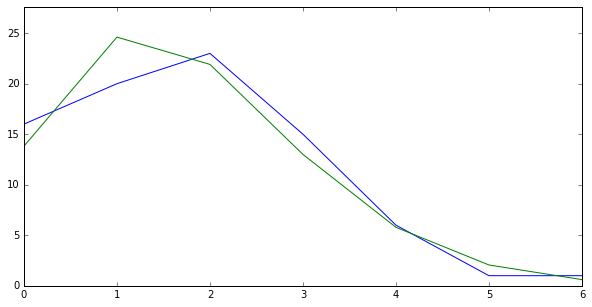

In [45]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 10, 5
plt.xlim(0, len(l_keys) - 1)
plt.ylim(0, max(Ni) + 3)
plt.plot(l_keys, l_values)
plt.plot(l_keys, Ni)
plt.show()